### Preprocessing Steps:

To ensure that our data analysis yields accurate and meaningful insights, it was necessary to perform several preprocessing steps on the dataset. These steps focused on cleaning and organizing the **Close** column to address common data quality issues. Specifically, we needed to remove outliers, impute missing values, and sort the data based on their dates.

Outliers in the **Close** column can skew analysis and misrepresent trends, so we identified and removed them using the Interquartile Range (IQR). Missing values were addressed through imputation, using forward and backward fill methods to ensure continuity in the data. Additionally, sorting the data chronologically by the **Date** column was essential for time-series analysis, allowing us to identify trends and patterns over time.

By applying these preprocessing steps, we created a clean, well-structured dataset that enables better insights and more reliable visualizations in subsequent plots.

In [2]:
# Preprocessing steps for "Close" column

import os
import pandas as pd

# Step 1: Specify the folder containing the CSV files
folder_path = "Team_3"  

# Initialize a dictionary to hold the data for the DataFrame
data_dict = {}

# Step 2: Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    print(f"Analyzing file: {file_name}")
    
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Remove duplicate rows based on the 'Date' column, keeping the first occurrence
    data = data.drop_duplicates(subset='Date', keep='first')

    # Sort the dataset by the 'Date' column
    if 'Date' in data.columns:
        # Convert 'Date' column to datetime format if not already
        data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
        data = data.sort_values(by='Date').reset_index(drop=True)

    # Calculate Q1 and Q3 for "Close" column
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers in 'Close' column with NaN
    data['Close'] = data['Close'].apply(lambda x: x if lower_bound <= x <= upper_bound else pd.NA)

    # Impute missing values in 'Close' column using forward fill, then backward fill if needed
    data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')

    # Add the cleaned dataset to the dictionary with the filename as the key
    data_dict[file_name] = data


Analyzing file: BRK-A.csv
Analyzing file: DNUT.csv
Analyzing file: DPZ.csv
Analyzing file: LKNCY.csv


C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\i

Analyzing file: MCD.csv
Analyzing file: PZZA.csv
Analyzing file: QSR.csv


C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\i

Analyzing file: SBUX.csv
Analyzing file: WEN.csv
Analyzing file: YUM.csv


C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\ipykernel_3620\3700034561.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'] = data['Close'].fillna(method='ffill').fillna(method='bfill')
C:\Users\ghaza\AppData\Local\Temp\i

## Exercises:

1. For each dataset:
   - Print the number of rows and columns
   - Display the column names and their data types

In [3]:
# 1

# Iterate through the data in data_dict which is created after preprocessing steps
for file_name, data in data_dict.items():
    print(f"Analyzing file: {file_name}")
    
    # Print the number of rows and columns
    print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")
    
    # Display column names and their data types
    print("Column names and data types:")
    print(data.dtypes)
    print("-" * 40)

Analyzing file: BRK-A.csv
Number of rows: 11222, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: DNUT.csv
Number of rows: 810, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------------
Analyzing file: DPZ.csv
Number of rows: 5083, Number of columns: 7
Column names and data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: obje

2. Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close price trend for this period.

Processing file: BRK-A.csv
Number of rows where the date is in 2023: 250


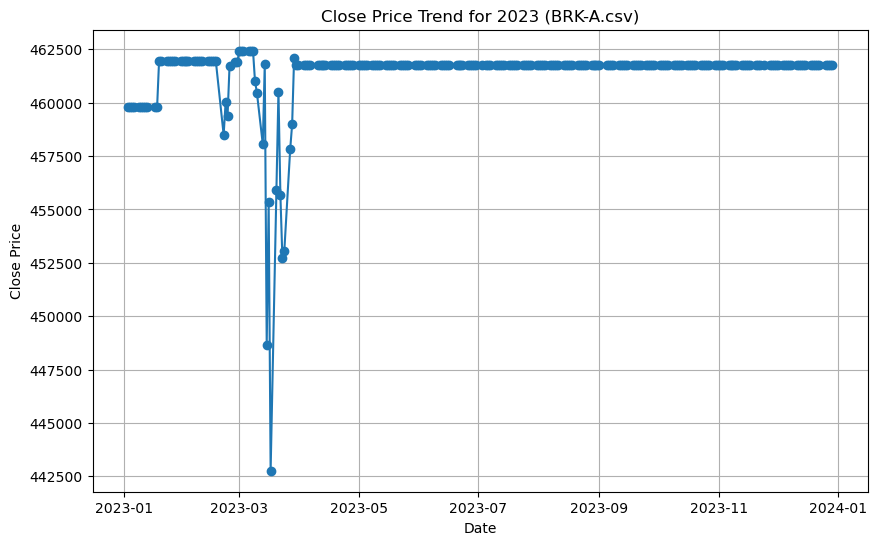

----------------------------------------
Processing file: DNUT.csv
Number of rows where the date is in 2023: 250


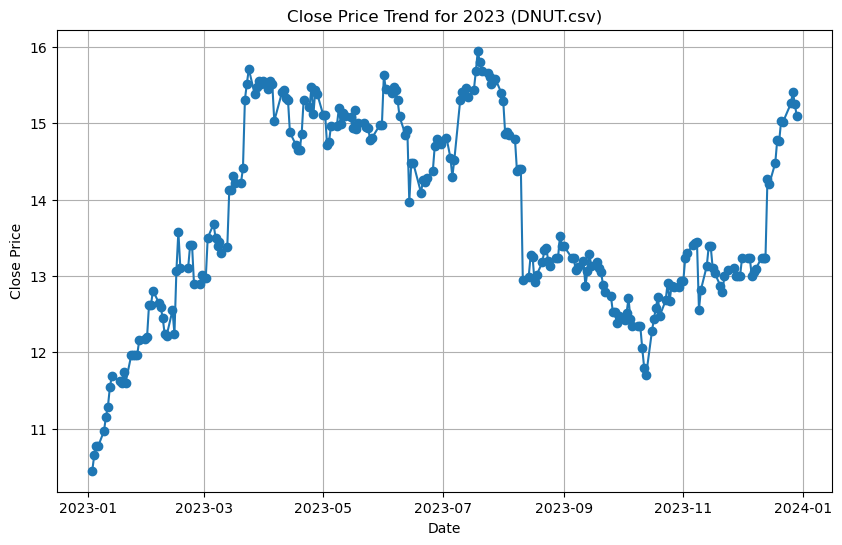

----------------------------------------
Processing file: DPZ.csv
Number of rows where the date is in 2023: 250


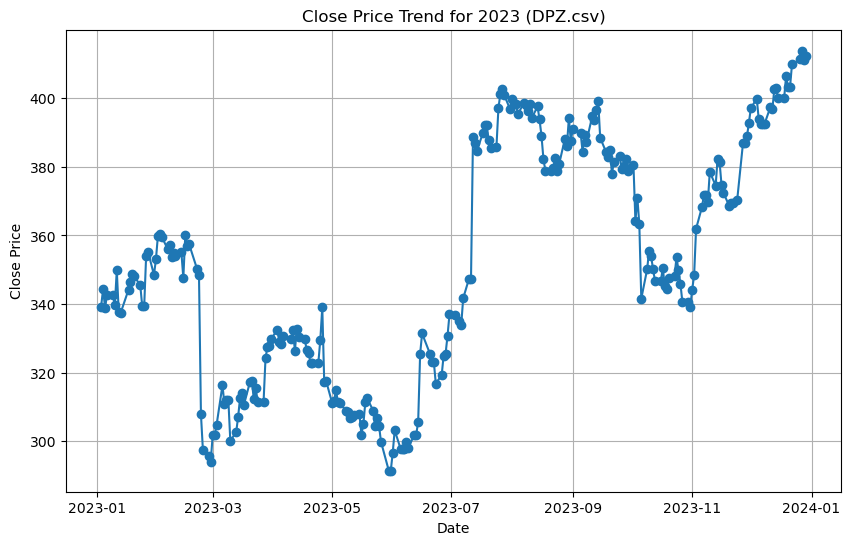

----------------------------------------
Processing file: LKNCY.csv
Number of rows where the date is in 2023: 250


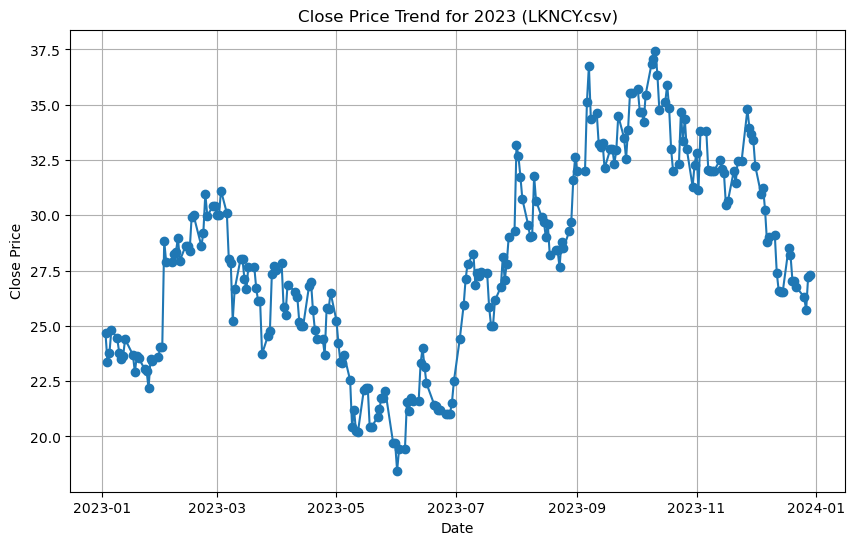

----------------------------------------
Processing file: MCD.csv
Number of rows where the date is in 2023: 250


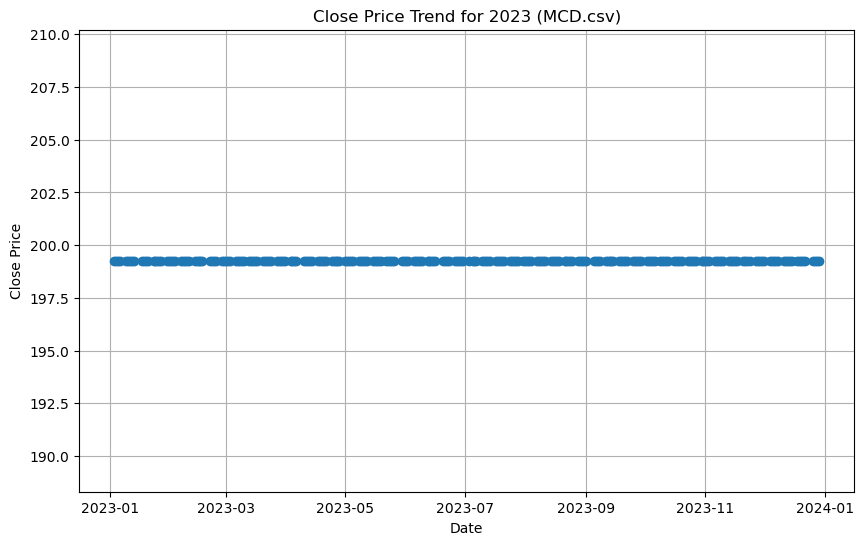

----------------------------------------
Processing file: PZZA.csv
Number of rows where the date is in 2023: 250


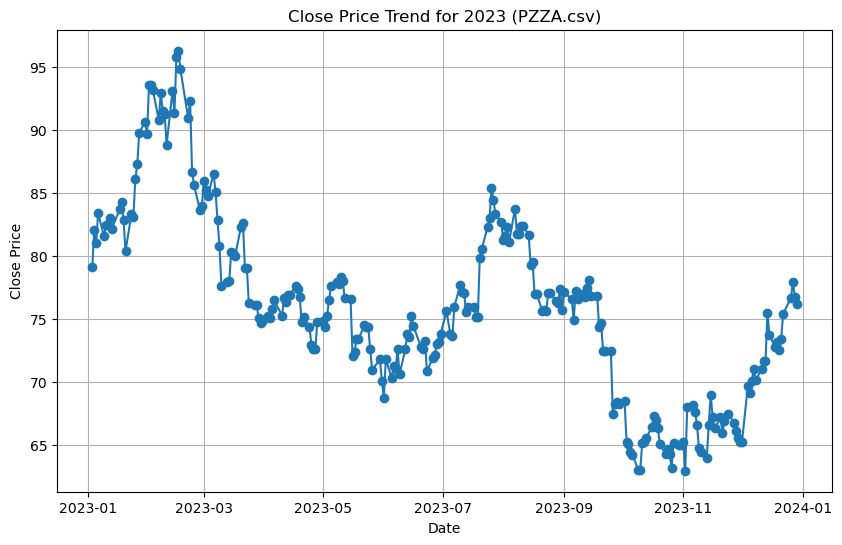

----------------------------------------
Processing file: QSR.csv
Number of rows where the date is in 2023: 250


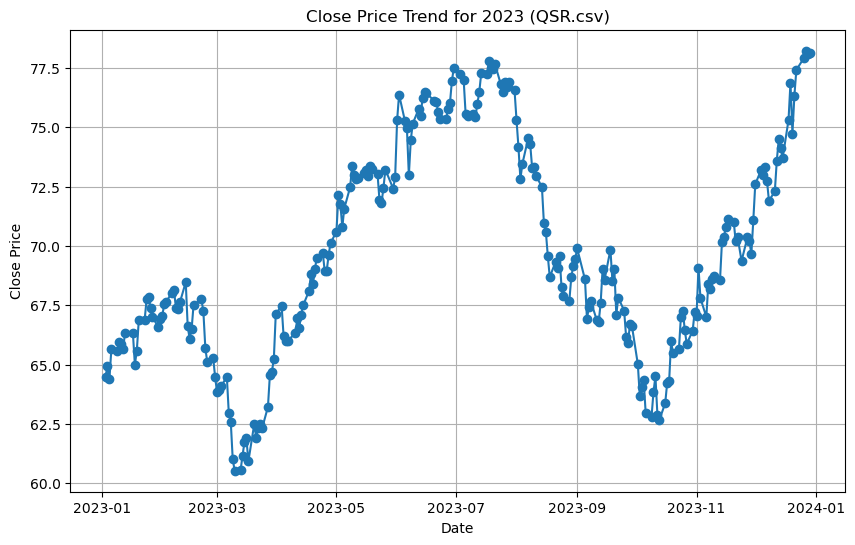

----------------------------------------
Processing file: SBUX.csv
Number of rows where the date is in 2023: 250


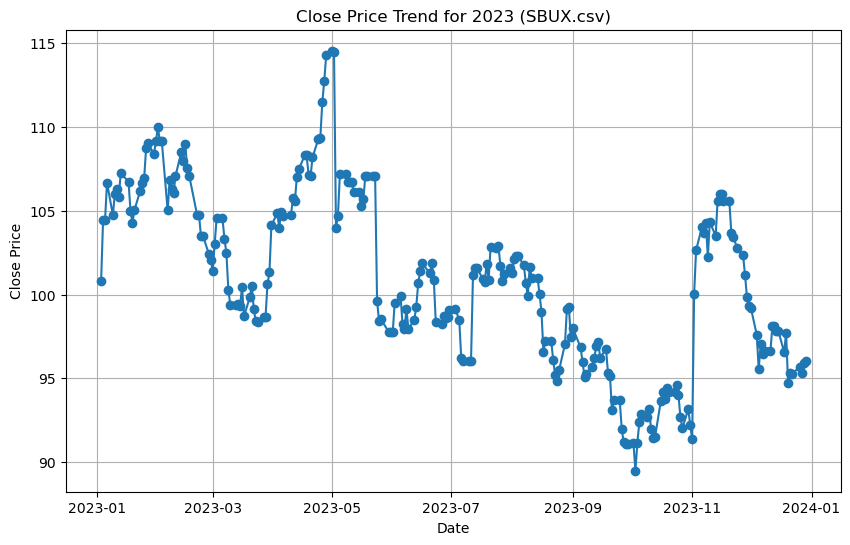

----------------------------------------
Processing file: WEN.csv
Number of rows where the date is in 2023: 250


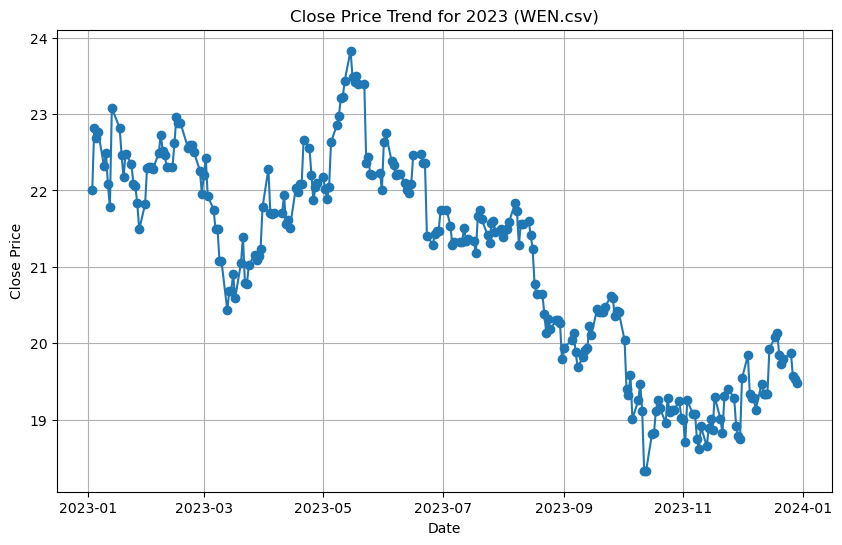

----------------------------------------
Processing file: YUM.csv
Number of rows where the date is in 2023: 250


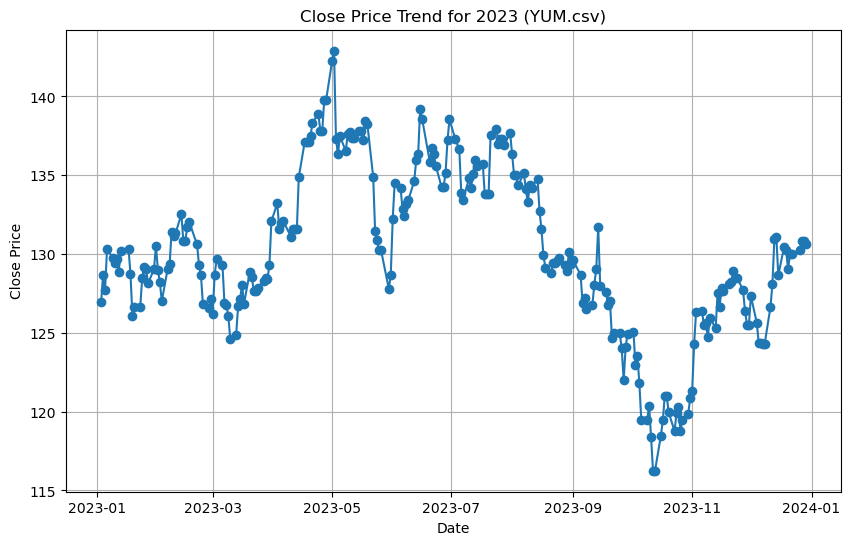

----------------------------------------


In [4]:
# 2

import matplotlib.pyplot as plt

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Convert the Date column to datetime
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Handle potential parsing issues
    if data['Date'].isna().any():
        print(f"Warning: Some dates could not be parsed in {file_name}. Skipping invalid rows.")
        data = data.dropna(subset=['Date'])  # Drop rows where Date conversion failed

    # Filter rows for the year 2023
    data_2023 = data[data['Date'].dt.year == 2023]

    # Print the number of rows
    print(f"Number of rows where the date is in 2023: {data_2023.shape[0]}")

    # Visualize the Close price trend
    if not data_2023.empty:  # Check if there are rows for 2023
        plt.figure(figsize=(10, 6))
        plt.plot(data_2023['Date'], data_2023['Close'], marker='o', linestyle='-')
        plt.title(f'Close Price Trend for 2023 ({file_name})')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.grid()
        plt.show()
    else:
        print(f"No data for 2023 in {file_name}. Skipping visualization.")
    
    print("-" * 40)


3. For each company, find the day with the highest Close price and display it alongside the price.

In [5]:
# 3

# Iterate through all datasets in data_dict
for file_name, data in data_dict.items():
    print(f"Processing file: {file_name}")
    
    # Find the row with the highest Close price
    if not data.empty:
        max_close_row = data.loc[data['Close'].idxmax()]
        highest_date = max_close_row['Date']
        highest_price = max_close_row['Close']
        print(f"Highest Close price for {file_name}: {highest_price} on {highest_date}")
    else:
        print(f"No valid Close data in {file_name}.")
    
    print("-" * 40)


Processing file: BRK-A.csv
Highest Close price for BRK-A.csv: 463000.0 on 2022-12-09 00:00:00
----------------------------------------
Processing file: DNUT.csv
Highest Close price for DNUT.csv: 18.200000762939453 on 2021-07-08 00:00:00
----------------------------------------
Processing file: DPZ.csv
Highest Close price for DPZ.csv: 564.3300170898438 on 2021-12-31 00:00:00
----------------------------------------
Processing file: LKNCY.csv
Highest Close price for LKNCY.csv: 45.900001525878906 on 2020-01-13 00:00:00
----------------------------------------
Processing file: MCD.csv
Highest Close price for MCD.csv: 199.2700042724609 on 2019-10-22 00:00:00
----------------------------------------
Processing file: PZZA.csv
Highest Close price for PZZA.csv: 132.60000610351562 on 2021-12-23 00:00:00
----------------------------------------
Processing file: QSR.csv
Highest Close price for QSR.csv: 82.75 on 2024-03-13 00:00:00
----------------------------------------
Processing file: SBUX.csv
